In [2]:
import glob
import pandas as pd
import re

In [135]:
filenames = glob.glob('tesseract_output/*.txt')
plates = []

In [136]:
for file in filenames:
    raw_txt = open(file, 'r').read()
    plate = {'filename': file}

    # Search for the date
    match = re.search(r'.*\d, \d\d\d\d', raw_txt)
    if match:
        plate['date'] = match.group(0)
    
    # Search for the plate number
    match = re.search(r'plate (.*)\.', raw_txt)
    if match:
        plate['plate'] = match.group(1)
    
    # Search for the rejection reasons
    match = re.search(r'reasons:(.*)Please', raw_txt)
    if match:
        plate['reasons'] = match.group(1)
    
    # Add the plate to the list
    plates.append(plate)
    
plates_df = pd.DataFrame(plates)

In [137]:
plates_df.head()

,date,filename,plate
0,"September 23, 2013",tesseract_output/vanity_plate-0.png.txt,NUTDEEP
1,"October 11, 2013",tesseract_output/vanity_plate-1.png.txt,KILLR
2,"September 19, 2013",tesseract_output/vanity_plate-10.png.txt,BENWAH
3,"September 23, 2013",tesseract_output/vanity_plate-11.png.txt,MAMS
4,"August 19, 2013",tesseract_output/vanity_plate-12.png.txt,CATLII‘S


In [138]:
plates_df.shape

(83, 3)

In [139]:
# Get rid of the empty rows (the black pages)
plates_df.dropna(thresh=2, inplace=True)

In [140]:
# Convert the file path to the file name
plates_df['filename'].replace(to_replace='.*\/(.*)\..*', value=r'\1', regex=True, inplace=True)

In [141]:
# Save the CSV
plates_df.to_csv('vanity_license_plates.csv')

In [4]:
plates_df = pd.read_csv('vanity_license_plates.csv')

In [24]:
plates_df['date'] = pd.to_datetime(plates_df['date'], format='%B %d, %Y', errors='coerce')

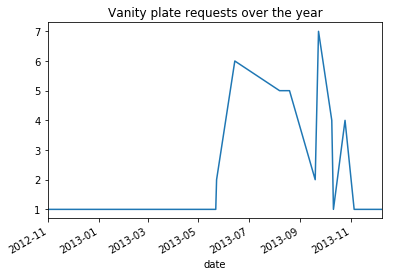

In [28]:
%matplotlib inline
plates_df.groupby('date')['filename'].count().plot(title='Vanity plate requests over the year')